In [1]:
import backtrader as bt
import pandas as pd

Read data from  CSV and Plot 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.470741,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481928,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378825,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367034,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409362,447610800
2010-01-11,7.600000,7.607143,7.444643,7.503929,6.352822,462229600
2010-01-12,7.471071,7.491786,7.372143,7.418571,6.280559,594459600
2010-01-13,7.423929,7.533214,7.289286,7.523214,6.369147,605892000
2010-01-14,7.503929,7.516429,7.465000,7.479643,6.332263,432894000


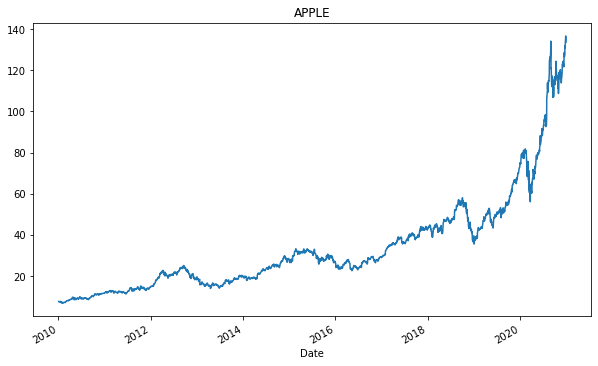

In [2]:
data = pd.read_csv('AAPL.csv', parse_dates=True, index_col='Date')
data['Close'].plot(figsize=(10, 6), title='APPLE')
display(data.head(10))

Starting Portfolio Value: 1000.00
Final Portfolio Value: 1095.76


<IPython.core.display.Javascript object>


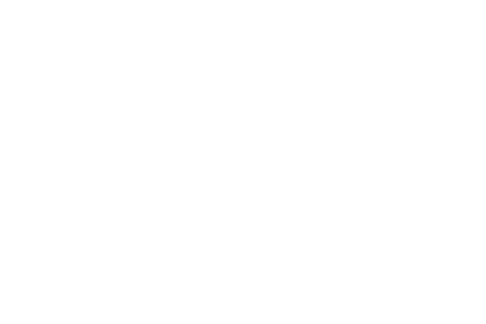

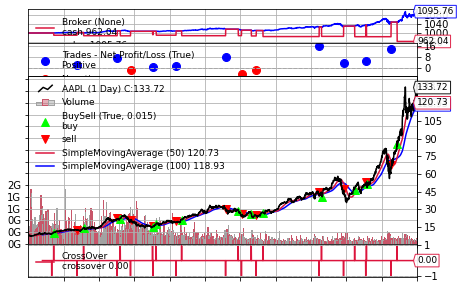

In [3]:

# class for  strategy 

class MovingAverageCrossStrategy(bt.Strategy):
    # set paramters 
    params = (
        ('fast_ma_period',50),
        ('slow_ma_period',100)
    )
    #init  
    def __init__(self):
        self.fast_ma = bt.indicators.SimpleMovingAverage(self.data, period=self.params.fast_ma_period)
        self.slow_ma = bt.indicators.SimpleMovingAverage(self.data, period=self.params.slow_ma_period)
        self.crossover = bt.indicators.CrossOver(self.fast_ma, self.slow_ma)
      #run over  the  data and check is it possible  to  buy or sell   
    def next(self):
        if not self.position:
            if self.crossover > 0:
                self.buy()
        elif self.crossover < 0:
            self.sell()

if __name__ == '__main__':
    cerebro = bt.Cerebro()
    cerebro.addstrategy(MovingAverageCrossStrategy)
    
    data = bt.feeds.GenericCSVData(dataname='AAPL.csv',
                                    dtformat='%Y-%m-%d',
                                    datetime=0,
                                    open=1,
                                    high=2,
                                    low=3,
                                    close=4,
                                    adjclose=5,
                                    volume=6)
    cerebro.adddata(data)
    
    cerebro.broker.set_cash(1000)
    
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
    
    # running  
    results = cerebro.run()
    
    # output solution 
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
    
    # ploting 
    cerebro.plot()

